<a href="https://colab.research.google.com/github/HariOS92/guvi/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
data=pd.read_csv('train-chennai-sale.csv')
print(data.head())
data.describe().T
data.info()

   PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0

* PRT_ID - 
* AREA - are of house available
* INT_SQFT - Square feet of house
* DATE_SALE - Sale of house sold
* DIST_MAINROAD - distance of house from main road
* N_BEDROOM - number of bedrooms in house
* N_BATHROOM - number of bathrooms in house
* N_ROOM - number of rooms in house
* SALE_COND - 
* PARK_FACIL - whether Parking facility available or not
* DATE_BUILD - date at which house built
* BUILDTYPE - type of build
* UTILITY_AVAIL - utilities available for house
* STREET - street at which house available
* MZZONE - 
* QS_ROOMS - 
* QS_BATHROOM - 
* QS_BEDROOM - 
* QS_OVERALL - 
* REG_FEE - Registration fees for house
* COMMIS - Commission for house selling
* SALES_PRICE - Proce of house sold

**CLEANING OF DATA**

---

* Treating null values
* Checking Spelling mistakes
* Plotting distribution of feature and against target

**NULL IMPUTATION**

In [73]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [74]:
data['QS_OVERALL'].mean()
data['QS_OVERALL'].value_counts()
data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean(),inplace=True)
data['QS_OVERALL'].describe()
data['N_BATHROOM'].fillna(1,inplace=True)
data['N_BATHROOM'].value_counts()
data['N_BEDROOM'].value_counts()
data['N_BEDROOM'].fillna(1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**TARGET**

---

Combining registration fees and commission to sales price

In [75]:
data['SALES_PRICE']+=data['COMMIS']+data['REG_FEE']
data.drop(['COMMIS','REG_FEE'],axis=1,inplace=True)

**AGE**

---


Calculating from date build and date sold of house and dropping ID column

In [76]:
data[['DATE_BUILD','DATE_SALE']]=data[['DATE_BUILD','DATE_SALE']].apply(pd.to_datetime)
data[['DATE_BUILD','DATE_SALE']]
data['AGE']=(data['DATE_SALE']-data['DATE_BUILD']).dt.days
data.drop(['DATE_BUILD','DATE_SALE'],axis=1,inplace=True)
data.drop(['PRT_ID'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  AGE            7109 non-null   int64  
dtypes: float

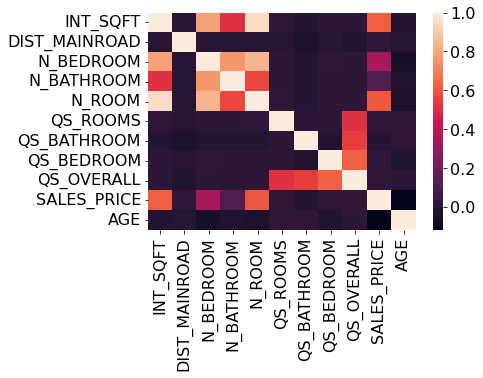

In [77]:
data.corr()
sns.heatmap(data.corr())

**AREA**

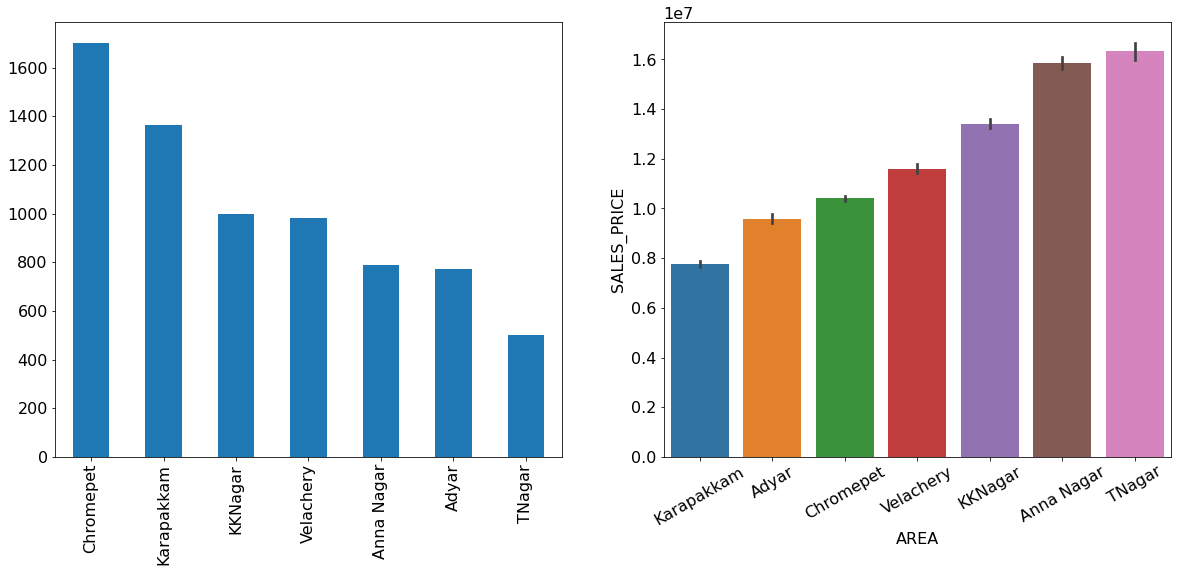

In [78]:
data['AREA']=data['AREA'].replace('Karapakam','Karapakkam')
data['AREA']=data['AREA'].replace('T Nagar','TNagar')
data['AREA']=data['AREA'].replace('Ana Nagar','Anna Nagar')
data['AREA']=data['AREA'].replace('Ann Nagar','Anna Nagar')
data['AREA']=data['AREA'].replace('Chrompet','Chromepet')
data['AREA']=data['AREA'].replace('Chormpet','Chromepet')
data['AREA']=data['AREA'].replace('Chrompt','Chromepet')
data['AREA']=data['AREA'].replace('Chrmpet','Chromepet')
data['AREA']=data['AREA'].replace('KK Nagar','KKNagar')
data['AREA']=data['AREA'].replace('Adyr','Adyar')
data['AREA']=data['AREA'].replace('Velchery','Velachery')
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
data['AREA'].value_counts().plot(kind='bar')
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['AREA'],data['SALES_PRICE'])
sns.barplot(x='AREA',y='SALES_PRICE',data=data,order=data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').index)
plt.xticks(rotation=30)
plt.show()

1. We can see that Chromepet data has large number of data followed by Karapakkam. TNagar has less number of data compartively.
2. TNagar has nighest price levels followed by Anna Nagar. There could be change in order if all area have equal number of house price details
3. Area has linear relationship with price. Label encoding can be done

**INT_SQFT**

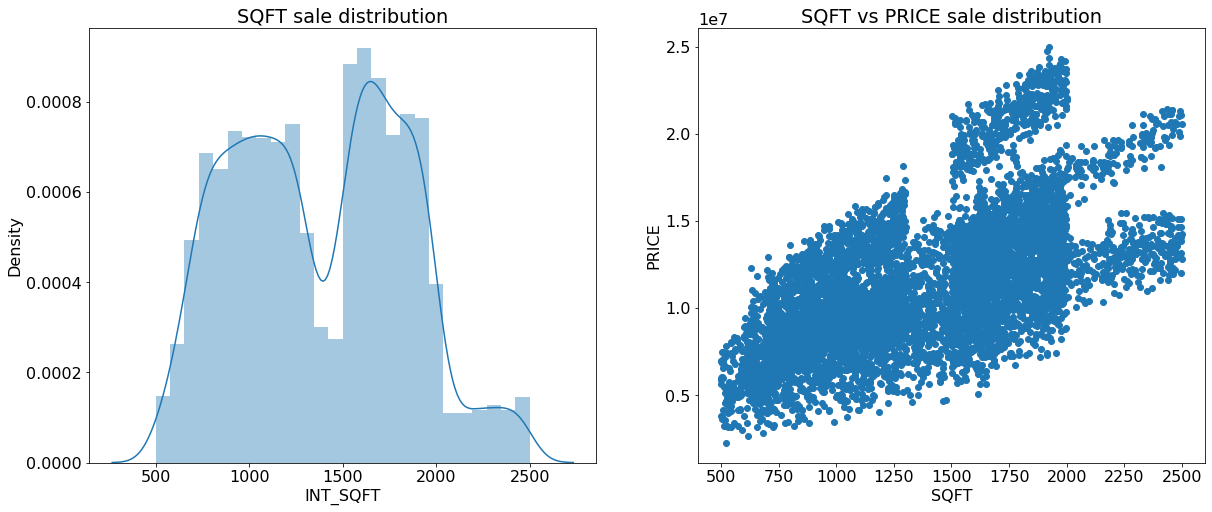

In [79]:
fig = plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size':16})
ax = fig.add_subplot(1,2,1)
ax.set(xlabel='SQFT',title='SQFT sale distribution')
# ax.hist(data['INT_SQFT'])
sns.distplot(data['INT_SQFT'])
ax = fig.add_subplot(1,2,2)
ax.set(xlabel='SQFT',ylabel='PRICE',title='SQFT vs PRICE sale distribution')
ax.scatter(data['INT_SQFT'],data['SALES_PRICE'])

1. Square feet data distribution does not follow any particular distribution
2. Strong Linear relationship between Square feet and sales price of houses

**DIST_MAINROAD**

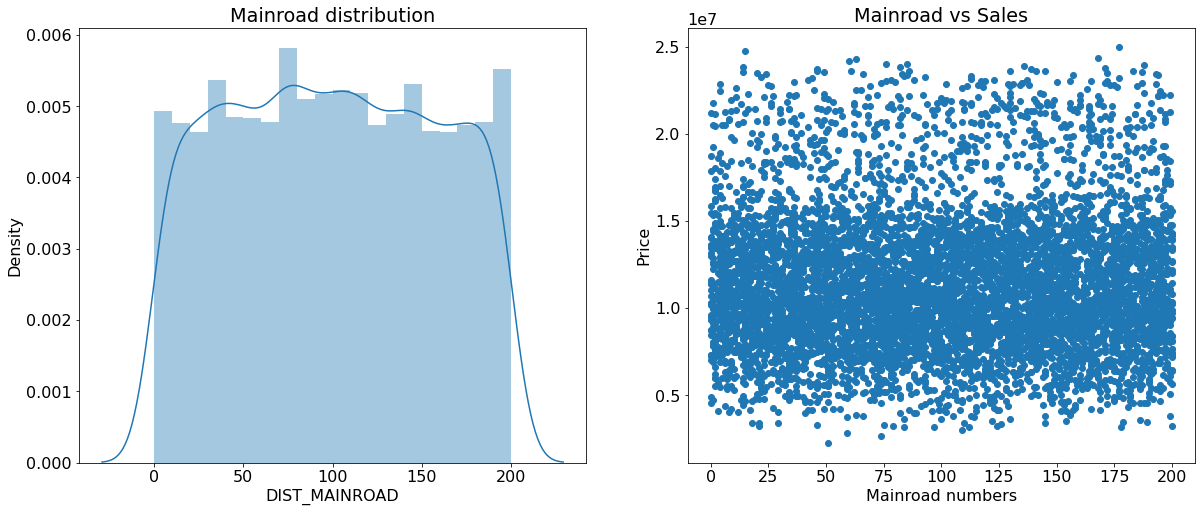

In [80]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
ax.set(xlabel='Mainroad numbers',title='Mainroad distribution')
# ax.hist(data['DIST_MAINROAD'])
sns.distplot(data['DIST_MAINROAD'])
ax = fig.add_subplot(1,2,2)
ax.set(xlabel='Mainroad numbers',ylabel='Price',title='Mainroad vs Sales')
ax.scatter(data['DIST_MAINROAD'],data['SALES_PRICE'])

1. Distance from mainroad house price data is uniformly distributed
2. No linear relationship between Distance from mainroad and sales price

**N_BEDROOM**

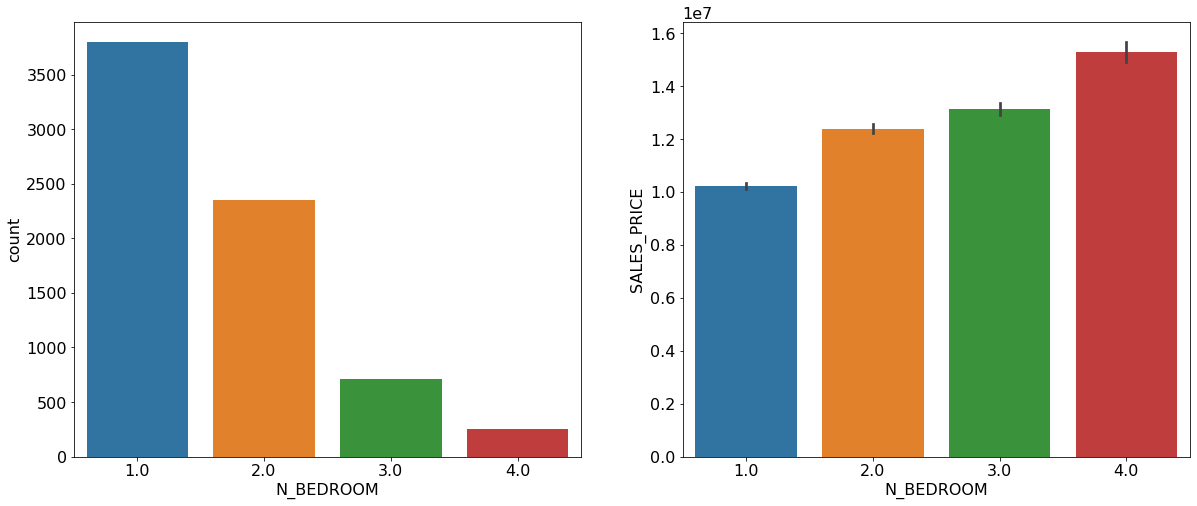

In [81]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['N_BEDROOM'])
sns.countplot(data['N_BEDROOM'])
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['N_BEDROOM'],data['SALES_PRICE'])
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=data,order=data[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE').index)

1. We can infer that most number of houses has single bedroom.
2. We can see price increases along with number of bedrooms. Hence, there is slight linear relationship between number of bedrooms and sales price

**N_BATHROOM**

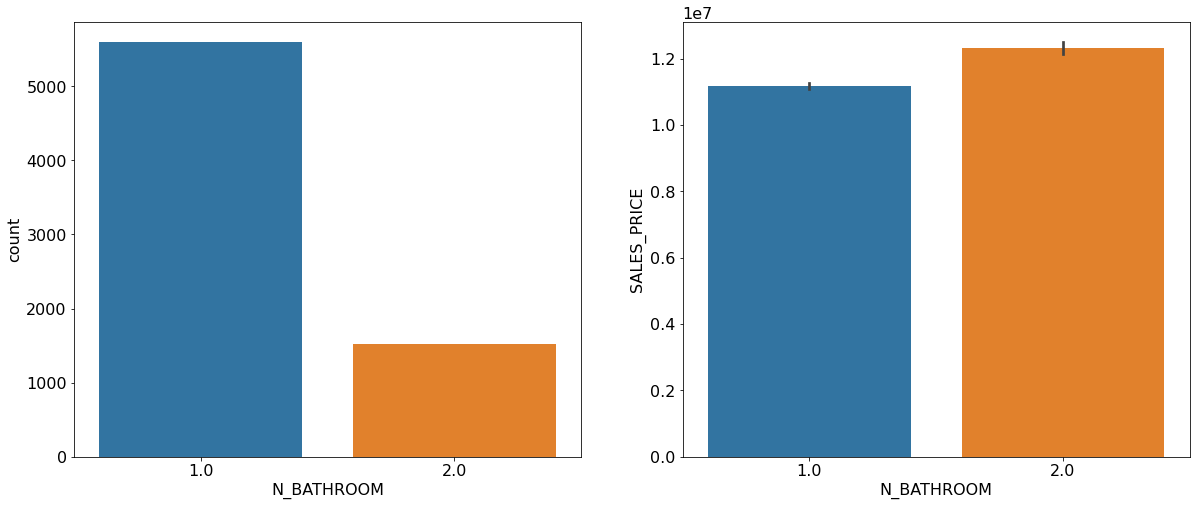

In [82]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
sns.countplot(data['N_BATHROOM'])
# data['N_BATHROOM'].plot(kind='hist')
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['N_BATHROOM'],data['SALES_PRICE'])
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=data,order=data[['N_BATHROOM','SALES_PRICE']].groupby('N_BATHROOM').mean().sort_values('SALES_PRICE').index)

1. There are more number of houses with single bathroom rather than 2 bathrooms
2. As expected, price increased for 2 number of bathrooms. Based on available (2) number of bathrooms data, slight linear relationship might exist between them



**N_ROOM**

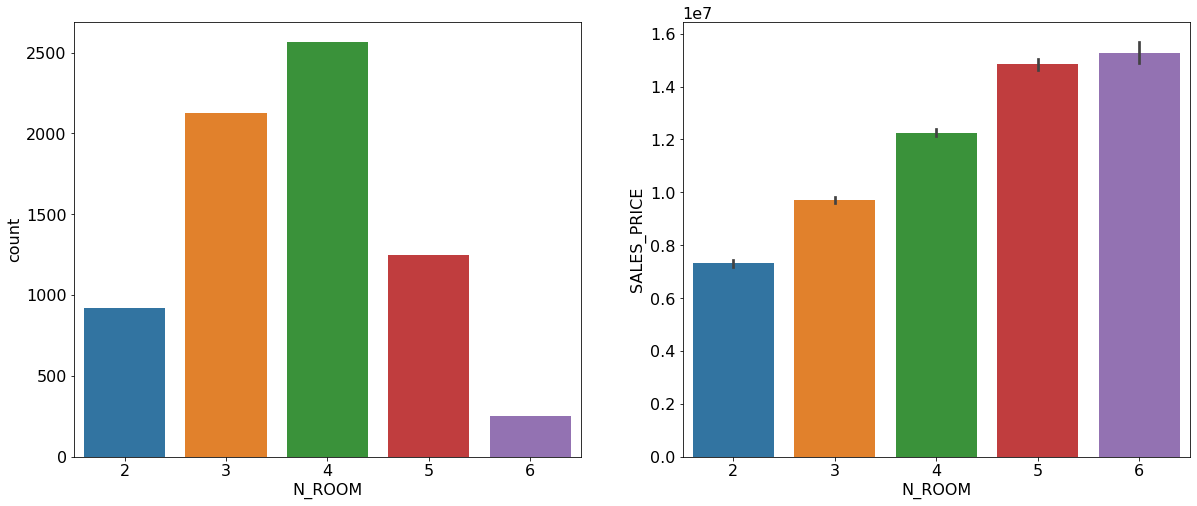

In [83]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# data['N_ROOM'].plot(kind='hist')
sns.countplot(data['N_ROOM'])
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['N_ROOM'],data['SALES_PRICE'])
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=data,order=data[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').index)

1. Most number of houses has 4 number of rooms
2. Even though the prices of house increases with number of rooms, there is decrease in price margin increase suggesting that only slight linear relationship exists.



**SALE_COND**

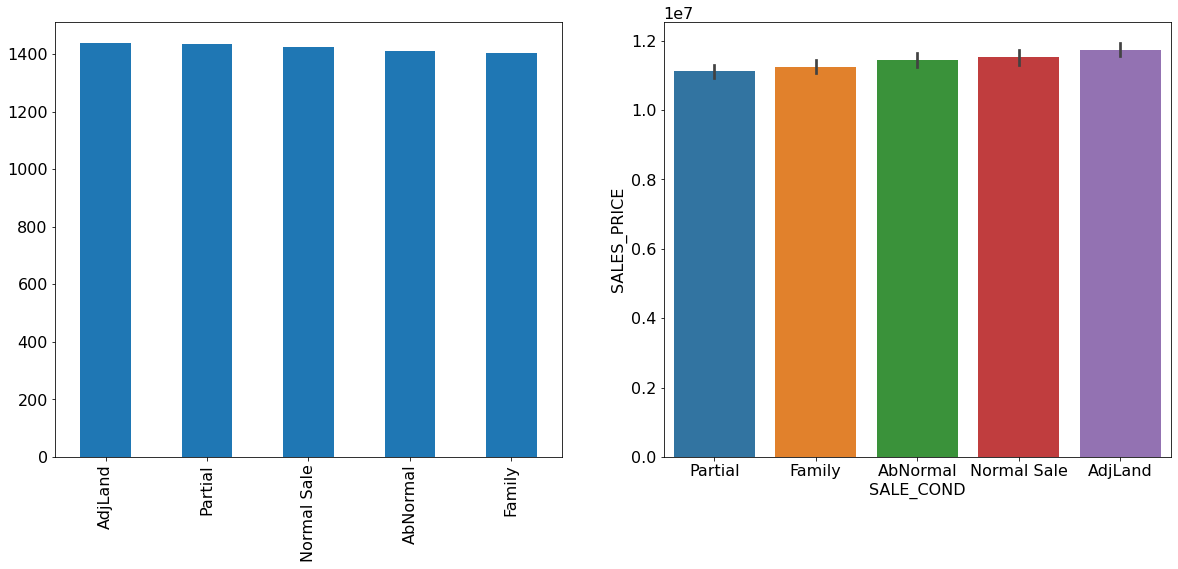

In [84]:
data['SALE_COND'].value_counts()
data['SALE_COND']=data['SALE_COND'].replace('Adj Land','AdjLand')
data['SALE_COND']=data['SALE_COND'].replace('Partiall','Partial')
data['SALE_COND']=data['SALE_COND'].replace('PartiaLl','Partial')
data['SALE_COND']=data['SALE_COND'].replace('Ab Normal','AbNormal')
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
data['SALE_COND'].value_counts().plot(kind='bar')
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['SALE_COND'],data['SALES_PRICE'])
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=data,order=data[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').index)

1. All sale conditions of houses has almost equal number of data
2. There is slight increase in price based on the sale conditions led to assumption of very slight linear relationship.



**PARK_FACIL**

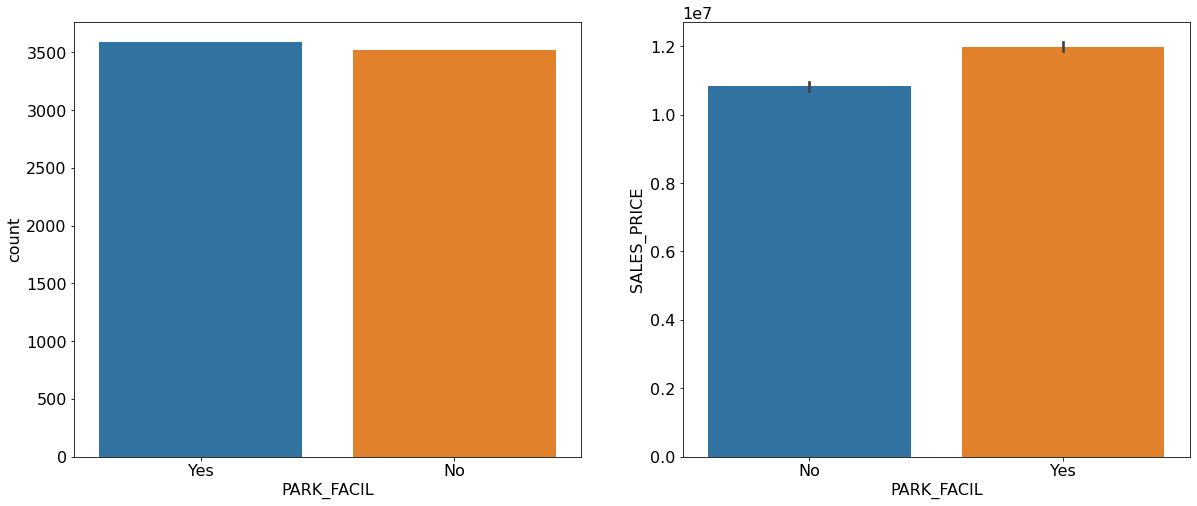

In [85]:
data['PARK_FACIL'].value_counts()
data['PARK_FACIL']=data['PARK_FACIL'].replace('Noo','No')
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['PARK_FACIL'])
sns.countplot(data['PARK_FACIL'])
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['PARK_FACIL'],data['SALES_PRICE'])
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=data,order=data[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('SALES_PRICE').index)

1. Equal number of houses are available with park facility and without as well
2. Houses with park facility has increase in price suggesting linear relationship exists
3. Since it is binary data, lable encoding can be done





**BUILDTYPE**

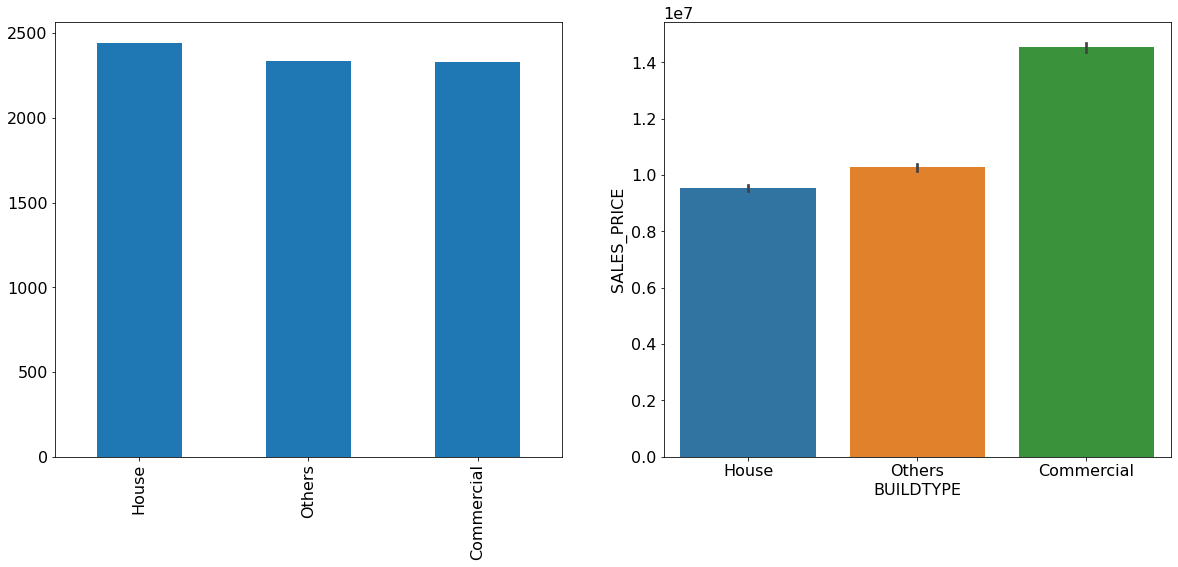

In [86]:
data['BUILDTYPE'].value_counts()
data['BUILDTYPE']=data['BUILDTYPE'].replace('Other','Others')
data['BUILDTYPE']=data['BUILDTYPE'].replace('Comercial','Commercial')
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
data['BUILDTYPE'].value_counts().plot(kind='bar')
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['BUILDTYPE'],data['SALES_PRICE'])
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=data,order=data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').index)

1. Buildtype feature has almost equal number of data for their categories
2. Commercial house price are going for high prices but the increase in price is not linear



**UTILITY_AVAIL**

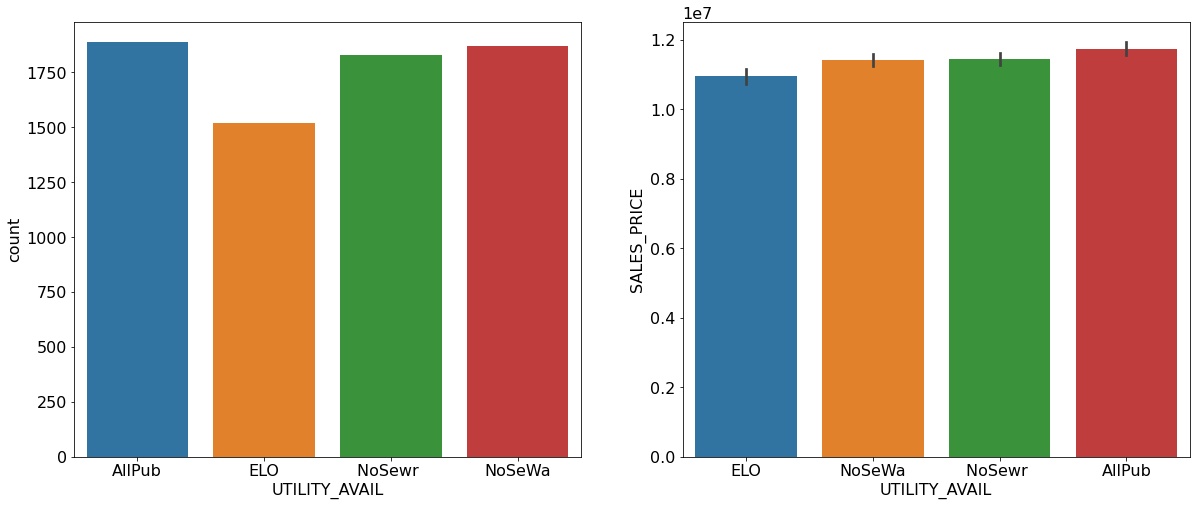

In [87]:
data['UTILITY_AVAIL'].value_counts()
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace('All Pub','AllPub')
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['UTILITY_AVAIL'])
sns.countplot(data['UTILITY_AVAIL'])
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['UTILITY_AVAIL'],data['SALES_PRICE'])
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=data,order=data[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').index)



1. Number of data in each category of Utilities are almost equal except ELO category
2. There isn't much change in price based on utility category and it should be major factor in deciding the price



**STREET**

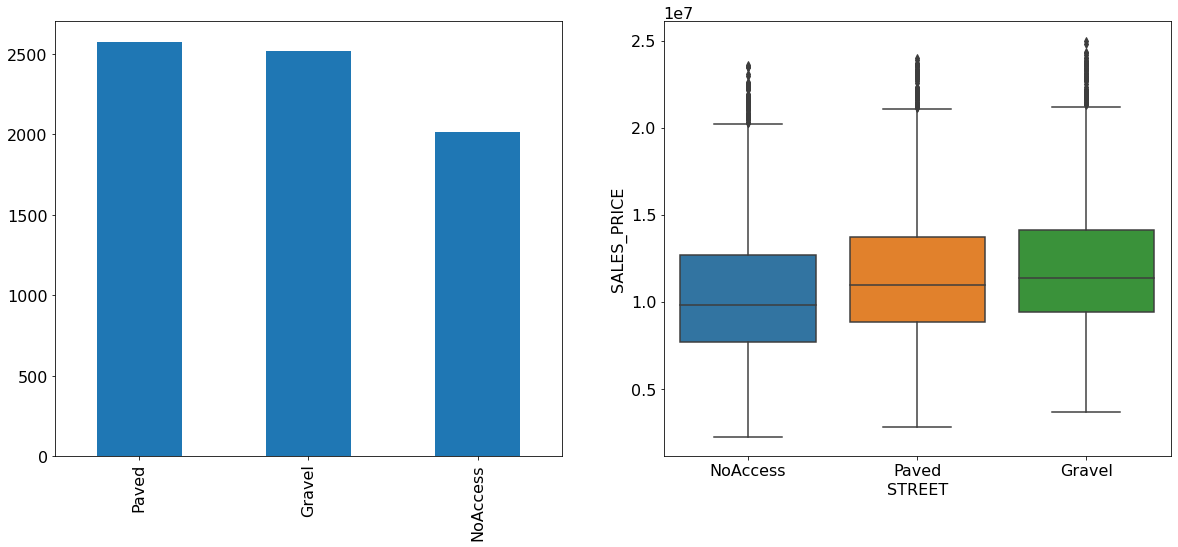

In [88]:
data['STREET'].value_counts()
data['STREET'] = data['STREET'].replace('Pavd','Paved')
data['STREET'] = data['STREET'].replace('No Access','NoAccess')
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
data['STREET'].value_counts().plot(kind='bar')
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['STREET'],data['SALES_PRICE'])
sns.boxplot(x='STREET',y='SALES_PRICE',data=data,order=data[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').index)

1. Almost equal number of data are present in each street facility
2. There is slight increase in price based on street facility and hence we can consider linear relationship exists
3. Label encoding can be done





**MZZONE**

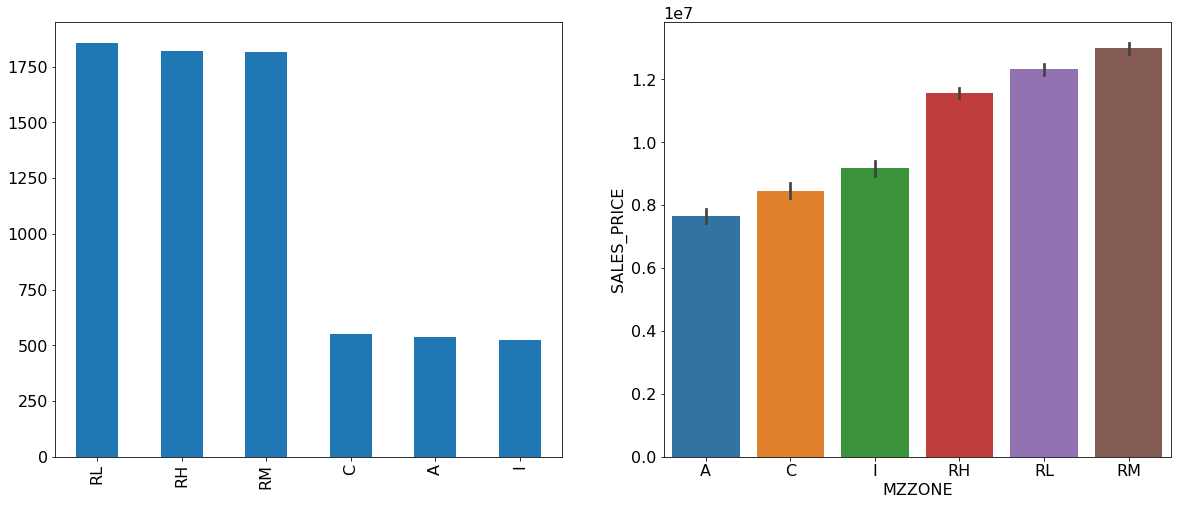

In [89]:
data['MZZONE'].value_counts()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
data['MZZONE'].value_counts().plot(kind='bar')
ax = fig.add_subplot(1,2,2)
# ax.scatter(data['MZZONE'],data['SALES_PRICE'])
sns.barplot(x='MZZONE',y='SALES_PRICE',data=data,order=data[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').index)

1. There are equal number of data in RL,RH,RM area zone while C,A,I area zone has equal number of data
2. Price increases with each category of mzzone category and RM zone has higher prices
3. Linear relationship exists and lable encoding can be done



**QS_ROOMS**

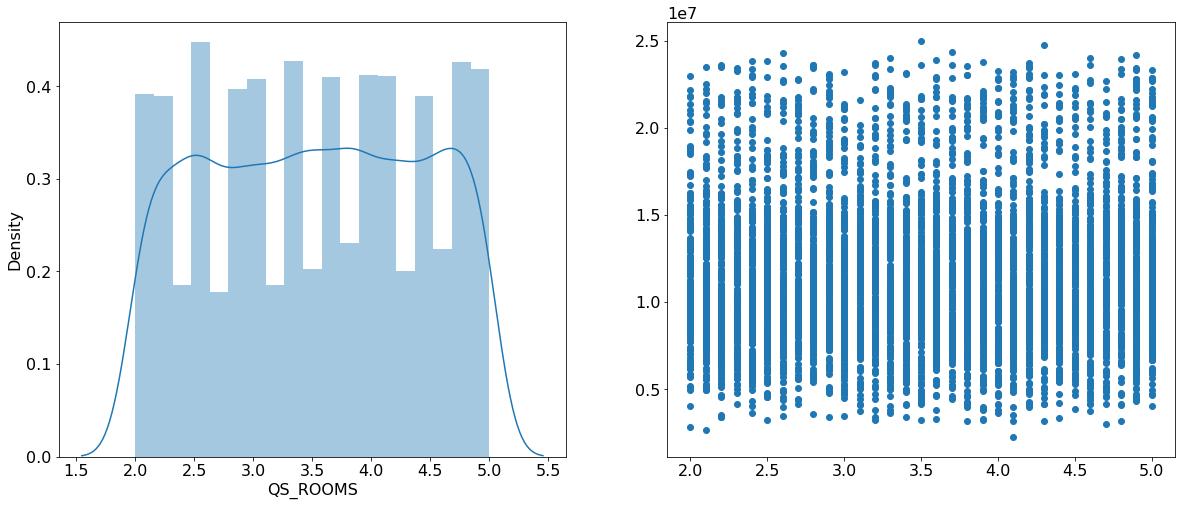

In [90]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['QS_ROOMS'])
sns.distplot(data['QS_ROOMS'])
ax = fig.add_subplot(1,2,2)
ax.scatter(data['QS_ROOMS'],data['SALES_PRICE'])

1. Almost uniformly distributed data for QS_ROOMS
2. No much variation in price with respect to values of QS_ROOMS. Hence, it will be much factor in determining price.



**QS_BATHROOM**

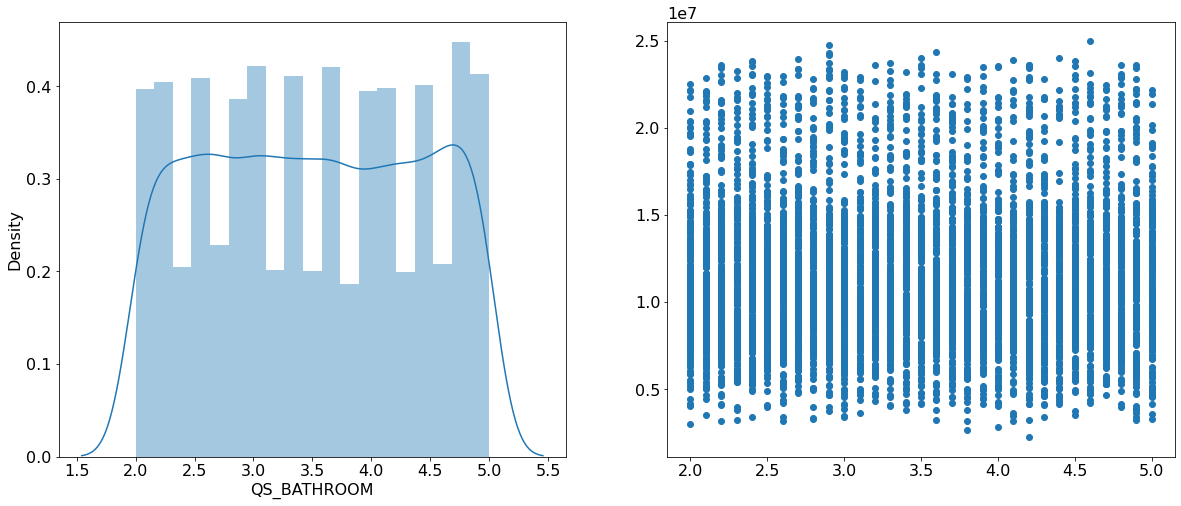

In [91]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['QS_BATHROOM'])
sns.distplot(data['QS_BATHROOM'])
ax = fig.add_subplot(1,2,2)
ax.scatter(data['QS_BATHROOM'],data['SALES_PRICE'])

1. Almost uniformly distributed data for QS_BATHROOM
2. No much variation in price with respect to values of QS_BATHROOM. Hence, it will be much factor in determining price.

**QS_BEDROOM**

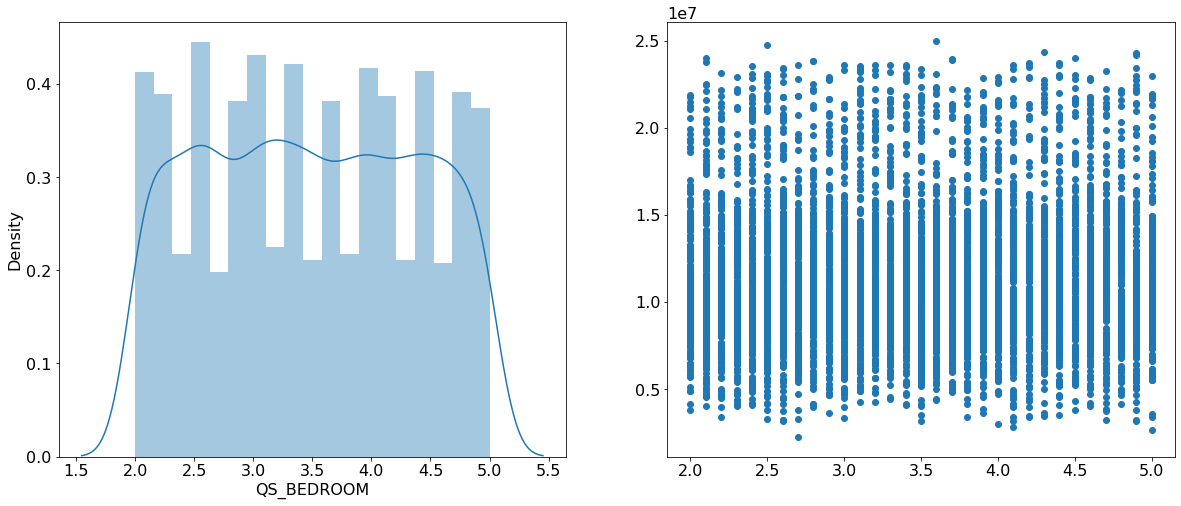

In [92]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['QS_BEDROOM'])
sns.distplot(data['QS_BEDROOM'])
ax = fig.add_subplot(1,2,2)
ax.scatter(data['QS_BEDROOM'],data['SALES_PRICE'])

1. Almost uniformly distributed data for QS_BEDROOM
2. No much variation in price with respect to values of QS_BEDROOM. Hence, it will be much factor in determining price.

**QS_OVERALL**

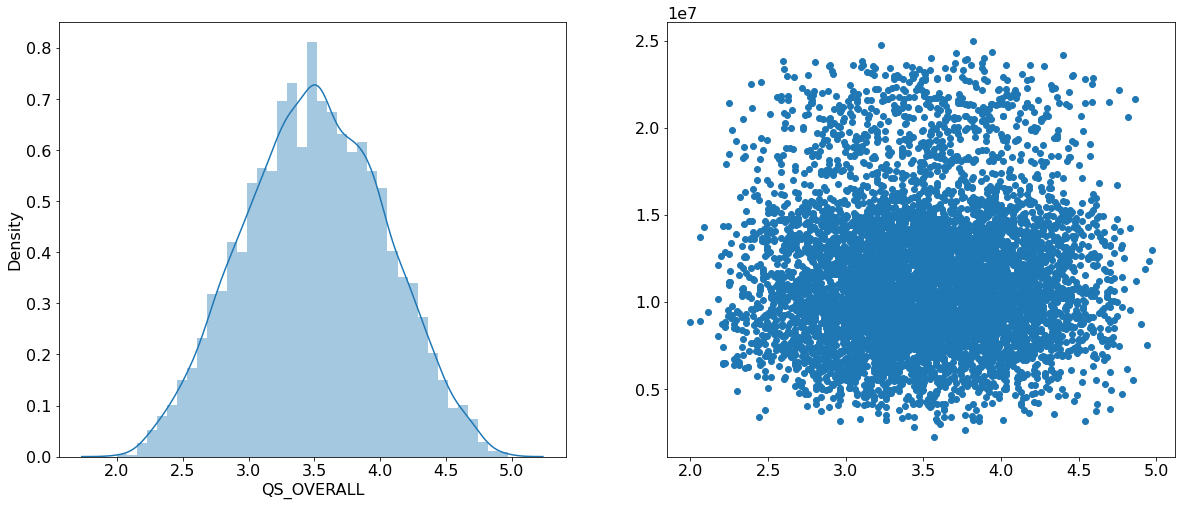

In [93]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['QS_OVERALL'])
sns.distplot(data['QS_OVERALL'])
ax = fig.add_subplot(1,2,2)
ax.scatter(data['QS_OVERALL'],data['SALES_PRICE'])

1. Normally distributed data for QS_OVERALL
2. No much variation in price with respect to values of QS_OVERALL. Hence, it will not be much factor in determining price.

**AGE**

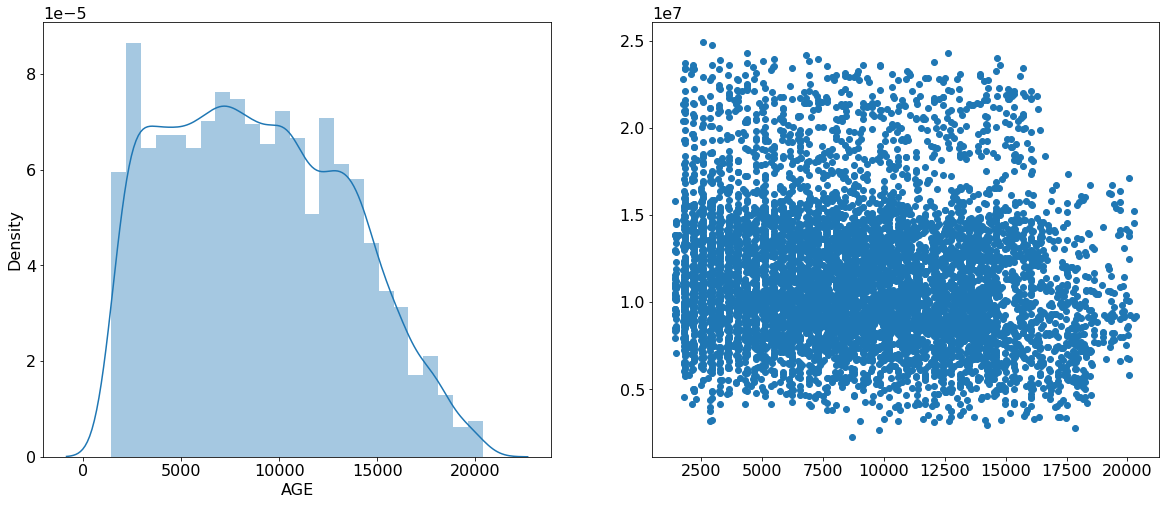

In [94]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
# ax.hist(data['AGE'])
sns.distplot(data['AGE'])
ax = fig.add_subplot(1,2,2)
ax.scatter(data['AGE'],data['SALES_PRICE'])

1. Slightly right skewed distribution of data for age of houses
2. There is only decline for very old houses. Otherwise, price seems to remain almost constant. Hence, age will not be mojor factor in determining price



**ENCODING**

In [95]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
areaEncode={'TNagar':1,'Anna Nagar':2,'KKNagar':3,'Velachery':4,'Chromepet':5,'Adyar':6,'Karapakkam':7}
data['AREA']=data['AREA'].map(areaEncode)
buildEncode={'Commercial':1,'Others':2,'House':3}
data['BUILDTYPE']=data['BUILDTYPE'].map(buildEncode)
mzEncode={'RM':1,'RL':2,'RH':3,'I':4,'C':5,'A':6}
data['MZZONE']=data['MZZONE'].map(mzEncode)
parkEncode={'Yes':1,'No':2}
data['PARK_FACIL']=data['PARK_FACIL'].map(parkEncode)
streetEncode={'Gravel':1,'Paved':2,'NoAccess':3}
data['STREET']=data['STREET'].map(streetEncode)
salecondEncode={'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5}
data['SALE_COND']=data['SALE_COND'].map(salecondEncode)

In [96]:
# data['UTILITY_AVAIL'].unique().tolist()
# from sklearn.preprocessing import OneHotEncoder
# onehot=OneHotEncoder(sparse=False)
# encoded=onehot.fit_transform(data[['UTILITY_AVAIL']])
# data['UTILITY_ENC']=pd.DataFrame(encoded,columns=data['UTILITY_AVAIL'].unique().tolist())
# data['UTILITY_ENC']
data.drop(['UTILITY_AVAIL'],inplace=True,axis=1)

**REARRANGING COLUMNS**

In [97]:
cols=data.columns.tolist()
cols=cols[-1:]+cols[:-1]
data=data[cols]
data.head()

,AGE,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,16031,7,1004,131,1.0,1.0,3,3,1,1,2,6,4.0,3.9,4.9,4.330,8124400
1,4015,2,1986,26,2.0,1.0,5,3,2,1,1,3,4.9,4.2,2.5,3.765,22781941
2,7152,6,909,70,1.0,1.0,3,3,1,1,1,2,4.1,3.8,2.2,3.090,13672408
3,8030,4,1855,14,3.0,2.0,5,2,2,2,2,4,4.7,3.9,3.6,4.010,10063653
4,10802,7,1226,84,1.0,1.0,3,3,1,2,1,5,3.0,2.5,4.1,3.290,7717313


**DATA SPLITTING**

In [98]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5331, 16) (5331,)
(1778, 16) (1778,)


**FEATURE SELECTION**

In [99]:
data.columns.to_list()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator=LinearRegression()
sel=RFE(estimator,n_features_to_select=8,step=2)
sel=sel.fit(x_train,y_train)
print(list(zip(cols,sel.support_)))

[('AGE', False), ('AREA', True), ('INT_SQFT', False), ('DIST_MAINROAD', False), ('N_BEDROOM', True), ('N_BATHROOM', True), ('N_ROOM', True), ('SALE_COND', False), ('PARK_FACIL', True), ('BUILDTYPE', True), ('STREET', True), ('MZZONE', True), ('QS_ROOMS', False), ('QS_BATHROOM', False), ('QS_BEDROOM', False), ('QS_OVERALL', False)]


Using RFE feature selection method, we can see few features plays more factor in determining the prices of house. Hence, we can drop other features for better model training

In [100]:
type(x_train)
x_train.drop(['AGE','INT_SQFT','DIST_MAINROAD','SALE_COND','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1,inplace=True)
x_test.drop(['AGE','INT_SQFT','DIST_MAINROAD','SALE_COND','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1,inplace=True)
cols=x_train.columns.tolist()

**MODEL TRAINING**

In [101]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_validate
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, x, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.8832449519323635 0.8839708403809705
Alpha :  0.002 0.8832362928817424 0.883961250732874
Alpha :  0.003 0.8832218160635964 0.883945939155695
Alpha :  0.005 0.883177298689672 0.8838999938574705
Alpha :  0.01 0.8829922624659149 0.8837124264933374
Alpha :  0.02 0.8824059770195195 0.8831236774170126
Alpha :  0.03 0.8816407951135655 0.8823577839998208
Alpha :  0.04 0.8807641564847163 0.881481277401325
Alpha :  0.1 0.8743780857781998 0.8751000440192029
Alpha :  0.2 0.8616855602565785 0.8624148945851253
Alpha :  0.5 0.8167525256079496 0.8175055086670028
Alpha :  1 0.7401623545792331 0.7409464630899321


From R2 scores of training and test data, we can see that there is no much overfitting or underfitting in data

In [102]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Linear Regression metrics:")
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("R2:",metrics.r2_score(y_test,y_pred))

Linear Regression metrics:
MAE: 1110985.4447781723
MSE: 1946498876102.3484
R2: 0.8696566961880989


In [103]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(2,10):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  print(f"KNN Regression metrics for {i} neighbours:")
  print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
  print("MSE:",metrics.mean_squared_error(y_test,y_pred))
  print("R2:",metrics.r2_score(y_test,y_pred))

KNN Regression metrics for 2 neighbours:
MAE: 627651.9221034871
MSE: 748657909553.1163
R2: 0.9498676590291883
KNN Regression metrics for 3 neighbours:
MAE: 619035.6396700414
MSE: 715637211661.7697
R2: 0.9520788223184018
KNN Regression metrics for 4 neighbours:
MAE: 636081.6446850394
MSE: 735181173408.5334
R2: 0.9507701010163132
KNN Regression metrics for 5 neighbours:
MAE: 644194.0248593924
MSE: 749159538197.4425
R2: 0.9498340684961596
KNN Regression metrics for 6 neighbours:
MAE: 661659.1539182601
MSE: 790802701873.1565
R2: 0.9470455194754989
KNN Regression metrics for 7 neighbours:
MAE: 668822.0683753816
MSE: 797728069583.279
R2: 0.9465817764348365
KNN Regression metrics for 8 neighbours:
MAE: 671988.7270809899
MSE: 798685259631.4196
R2: 0.9465176801670285
KNN Regression metrics for 9 neighbours:
MAE: 669968.6657292839
MSE: 782868174663.3682
R2: 0.9475768388116704


In [104]:
from sklearn.tree import DecisionTreeRegressor
for i in range(3,10):
  decreg = DecisionTreeRegressor(max_depth=i)
  decreg.fit(x_train,y_train)
  y_pred=decreg.predict(x_test)
  print(f"Decision Tree Regression metrics for {i} depths:")
  print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
  print("MSE:",metrics.mean_squared_error(y_test,y_pred))
  print("R2:",metrics.r2_score(y_test,y_pred))
  print(list(zip(cols,decreg.feature_importances_)))

Decision Tree Regression metrics for 3 depths:
MAE: 1403736.6934920528
MSE: 3027408778450.345
R2: 0.7972757821661227
[('AREA', 0.6014880258821029), ('N_BEDROOM', 0.0), ('N_BATHROOM', 0.0), ('N_ROOM', 0.0), ('PARK_FACIL', 0.0), ('BUILDTYPE', 0.398511974117897), ('STREET', 0.0), ('MZZONE', 0.0)]
Decision Tree Regression metrics for 4 depths:
MAE: 1136211.892413197
MSE: 1968589939917.5796
R2: 0.8681774134216159
[('AREA', 0.5514118009815453), ('N_BEDROOM', 0.040025107745672), ('N_BATHROOM', 0.008779805965718661), ('N_ROOM', 0.02571272414156131), ('PARK_FACIL', 0.0), ('BUILDTYPE', 0.36533429745141827), ('STREET', 0.0), ('MZZONE', 0.008736263714084385)]
Decision Tree Regression metrics for 5 depths:
MAE: 967098.5337816809
MSE: 1428277908584.1204
R2: 0.9043583000986958
[('AREA', 0.5293215116495689), ('N_BEDROOM', 0.00918290371244121), ('N_BATHROOM', 0.008428075274211766), ('N_ROOM', 0.0752594364929746), ('PARK_FACIL', 0.0030301035921518203), ('BUILDTYPE', 0.351900085014644), ('STREET', 0.0), 

In [105]:
from sklearn.ensemble import RandomForestRegressor
for i in range(3,10):
  rfreg = RandomForestRegressor(max_depth=i)
  rfreg.fit(x_train,y_train)
  y_pred=rfreg.predict(x_test)
  print(f"Random Forest Regression metrics for {i} depths:")
  print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
  print("MSE:",metrics.mean_squared_error(y_test,y_pred))
  print("R2:",metrics.r2_score(y_test,y_pred))
  print(list(zip(cols,rfreg.feature_importances_)))

Random Forest Regression metrics for 3 depths:
MAE: 1376798.9061918217
MSE: 2887045154659.2734
R2: 0.8066749442640603
[('AREA', 0.5931655153010016), ('N_BEDROOM', 0.0004644160187124884), ('N_BATHROOM', 0.0), ('N_ROOM', 0.00613286640622811), ('PARK_FACIL', 0.0), ('BUILDTYPE', 0.3998911285849469), ('STREET', 0.0), ('MZZONE', 0.0003460736891108119)]
Random Forest Regression metrics for 4 depths:
MAE: 1076012.7849804964
MSE: 1747900985102.1365
R2: 0.882955396516597
[('AREA', 0.5483596980378972), ('N_BEDROOM', 0.023390780835654556), ('N_BATHROOM', 0.007328559956601754), ('N_ROOM', 0.04435267247114186), ('PARK_FACIL', 0.0011487613438740673), ('BUILDTYPE', 0.36506271765233017), ('STREET', 0.0), ('MZZONE', 0.01035680970250033)]
Random Forest Regression metrics for 5 depths:
MAE: 909062.9923377393
MSE: 1256742687508.1738
R2: 0.9158448042573389
[('AREA', 0.5263610704915952), ('N_BEDROOM', 0.025099712861148427), ('N_BATHROOM', 0.010276096056373831), ('N_ROOM', 0.060025031981914216), ('PARK_FACIL'

We can see the R2 score increases with number of depths to Random forest regression. Depth value 9 gives accuracy of 96.9% and important features are Area and Build type which play major factor in determining the house price

In [106]:
import xgboost as xgb
xgbreg=xgb.XGBRegressor(n_estimators=100,max_depth=7)
xgbreg.fit(x_train,y_train)
y_pred=rfreg.predict(x_test)
print(f"XGBoost Regression metrics:")
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))
print(list(zip(cols,xgbreg.feature_importances_)))

[09:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regression metrics:
540591.8471601479
461914737135.6693
0.9690688272894213
[('AREA', 0.44931355), ('N_BEDROOM', 0.08241845), ('N_BATHROOM', 0.021515317), ('N_ROOM', 0.09900518), ('PARK_FACIL', 0.012657132), ('BUILDTYPE', 0.3035919), ('STREET', 0.008296163), ('MZZONE', 0.0232023)]


From the importance of features interrupted from XGboost regression model, Area and Buildtype plays the important role in determining the sale price of houses.